实例：泰坦尼克号幸存者的预测

In [46]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score

In [11]:
data = pd.read_csv("train.csv")

In [12]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


数据预处理

In [ ]:
# 筛选特征
# 删去与是否存活无关的特征
data.drop(['Cabin','Name','Ticket'], inplace=True, axis = 1)

In [23]:
# 处理缺失值
# 用均值填补年龄缺失值
data["Age"] = data["Age"].fillna(data["Age"].mean())
# 删去有缺失embarked的样本
data = data.dropna()

In [ ]:
# 将分类变量转换为数值便于入模
labels = data["Embarked"].unique().tolist()
# 这个方法适合于各分类之间没有顺序的特征变量转换
data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))
# 很灵巧的一个方法
data["Sex"] = (data["Sex"] == "male").astype("int")

C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_13080\2913615568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Embarked"] = data["Embarked"].apply(lambda x: labels.index(x))
C:\Users\HUAWEI\AppData\Local\Temp\ipykernel_13080\2913615568.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sex"] = (data["Sex"] == "male").astype("int")


In [30]:
data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,0
1,2,1,1,0,38.000000,1,0,71.2833,1
2,3,1,3,0,26.000000,0,0,7.9250,0
3,4,1,1,0,35.000000,1,0,53.1000,0
4,5,0,3,1,35.000000,0,0,8.0500,0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,0
887,888,1,1,0,19.000000,0,0,30.0000,0
888,889,0,3,0,29.699118,1,2,23.4500,0
889,890,1,1,1,26.000000,0,0,30.0000,1


分离特征和标签

In [31]:
x = data.iloc[:, data.columns != "Survived"]

In [34]:
y = data.iloc[:, data.columns == "Survived"]

分离训练集和测试集

In [38]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y, test_size=0.3)

In [42]:
# 将乱序index恢复顺序
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

调参

In [45]:
clf = DecisionTreeClassifier(random_state=30)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.7752808988764045

In [47]:
# 使用交叉验证
clf = DecisionTreeClassifier(random_state=30)
score = cross_val_score(clf, x, y, cv = 10).mean()
score

0.7514683350357507

0.8166624106230849


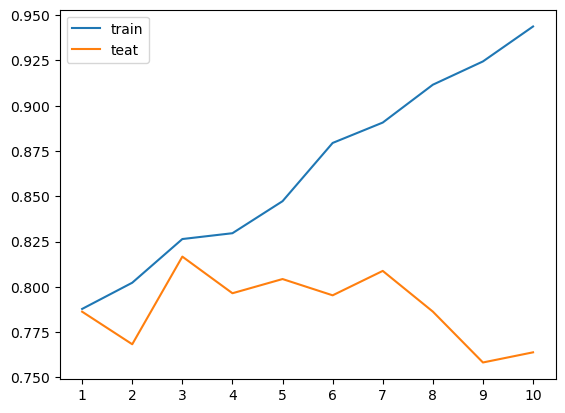

In [49]:
# 画学习曲线
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=30
                                 ,max_depth=i+1
                                 , criterion="entropy"
                                 )
    clf = clf.fit(Xtrain, Ytrain)
    score_train = clf.score(Xtrain, Ytrain)
    score_test = cross_val_score(clf, x, y, cv = 10).mean()
    tr.append(score_train)
    te.append(score_test)

print(max(te))
plt.plot(range(1,11), tr, label = "train")
plt.plot(range(1,11), te, label = "teat")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [52]:
# 网格搜索：同时调整多个参数的技术，本质是枚举
# 计算量大，耗时
import numpy as np
gini_threholds = np.linspace(0,0.5,50)

parameters = {"criterion":("gini","entropy")
              ,"splitter":("best","random")
              ,"max_depth":[*range(1,10)]
              ,"min_samples_leaf":[*range(1,50,5)]
              ,"min_impurity_decrease":np.linspace(0, 0.5, 20)
              }

clf = DecisionTreeClassifier(random_state=30)
GS = GridSearchCV(clf, parameters, cv = 10)
GS.fit(Xtrain, Ytrain)

KeyboardInterrupt: 

In [ ]:
GS.best_params_ # 返回我们输入的参数列表中的最佳组合

In [ ]:
GS.best_score_  # 网格搜索后的模型的评判标准